# Tarea 1: Solicitudes de Tarjetas de Crédito

### Importar los datos y hacer el analisis exploratorio

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import zipfile
import seaborn as sns
import plotly.express as px
from scipy import stats
from scipy.stats import chi2_contingency

In [55]:

app_record = pd.read_csv("datos/application_record.csv")
credit_record = pd.read_csv("datos/credit_record.csv")

In [56]:
credit_caracter = credit_record.merge(app_record, how = "outer", on ="ID")

In [57]:
credit_caracter.tail()

,ID,MONTHS_BALANCE,STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
1450670,6840104,NaN,NaN,M,N,Y,0.0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717.0,365243.0,1.0,0.0,0.0,0.0,NaN,1.0
1450671,6840222,NaN,NaN,F,N,N,0.0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939.0,-3007.0,1.0,0.0,0.0,0.0,Laborers,1.0
1450672,6841878,NaN,NaN,F,N,N,0.0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169.0,-372.0,1.0,1.0,0.0,0.0,Sales staff,1.0
1450673,6842765,NaN,NaN,F,N,Y,0.0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673.0,365243.0,1.0,0.0,0.0,0.0,NaN,2.0
1450674,6842885,NaN,NaN,F,N,Y,0.0,121500.0,Working,Secondary / secondary special,Married,House / apartment,-18858.0,-1201.0,1.0,0.0,1.0,0.0,Sales staff,2.0


## EDA

### Ver % de NaN por columna

In [58]:
credit_caracter.isna().sum()/len(credit_caracter)

ID                     0.000000
MONTHS_BALANCE         0.277181
STATUS                 0.277181
CODE_GENDER            0.186713
FLAG_OWN_CAR           0.186713
FLAG_OWN_REALTY        0.186713
CNT_CHILDREN           0.186713
AMT_INCOME_TOTAL       0.186713
NAME_INCOME_TYPE       0.186713
NAME_EDUCATION_TYPE    0.186713
NAME_FAMILY_STATUS     0.186713
NAME_HOUSING_TYPE      0.186713
DAYS_BIRTH             0.186713
DAYS_EMPLOYED          0.186713
FLAG_MOBIL             0.186713
FLAG_WORK_PHONE        0.186713
FLAG_PHONE             0.186713
FLAG_EMAIL             0.186713
OCCUPATION_TYPE        0.436892
CNT_FAM_MEMBERS        0.186713
dtype: float64

### Ver el tipo de las variables

In [59]:
credit_caracter.dtypes

ID                       int64
MONTHS_BALANCE         float64
STATUS                  object
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN           float64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH             float64
DAYS_EMPLOYED          float64
FLAG_MOBIL             float64
FLAG_WORK_PHONE        float64
FLAG_PHONE             float64
FLAG_EMAIL             float64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
dtype: object

### Número de Clientes

In [60]:
len(credit_caracter.ID.unique())

448038

### Ver el maximo número de meses 

In [61]:
print(f'El máximo número de meses es: {credit_record["MONTHS_BALANCE"].min()}')

El máximo número de meses es: -60


### Estadísticas sobre las variables númericas

In [62]:
credit_caracter.describe()

,ID,MONTHS_BALANCE,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,1.450675e+06,1.048575e+06,1.179815e+06,1.179815e+06,1.179815e+06,1.179815e+06,1179815.0,1.179815e+06,1.179815e+06,1.179815e+06,1.179815e+06
mean,5.356409e+06,-1.913700e+01,4.277560e-01,1.882163e+05,-1.608234e+04,5.876616e+04,1.0,2.224645e-01,2.962507e-01,9.788060e-02,2.203816e+00
std,5.406849e+05,1.402350e+01,7.381708e-01,1.048445e+05,4.131930e+03,1.373000e+05,0.0,4.159017e-01,4.566031e-01,2.971533e-01,9.035046e-01
min,5.001711e+06,-6.000000e+01,0.000000e+00,2.610000e+04,-2.520100e+04,-1.753100e+04,1.0,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,5.041481e+06,-2.900000e+01,0.000000e+00,1.215000e+05,-1.947300e+04,-3.242000e+03,1.0,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00
50%,5.097178e+06,-1.700000e+01,0.000000e+00,1.620000e+05,-1.571100e+04,-1.617000e+03,1.0,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00
75%,5.398598e+06,-7.000000e+00,1.000000e+00,2.250000e+05,-1.264600e+04,-4.120000e+02,1.0,0.000000e+00,1.000000e+00,0.000000e+00,3.000000e+00
max,7.999952e+06,0.000000e+00,1.900000e+01,6.750000e+06,-7.489000e+03,3.652430e+05,1.0,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+01


In [63]:
#número de IDs unicos en las dos tablas
print(f"Num de IDs unicos en credit_record {len(credit_record['ID'].unique())}")
print(f"Num de IDs unicos en credit_record {len(app_record['ID'].unique())}")

Num de IDs unicos en credit_record 45985
Num de IDs unicos en credit_record 438510


### Graficar la variable dependiente: STATUS

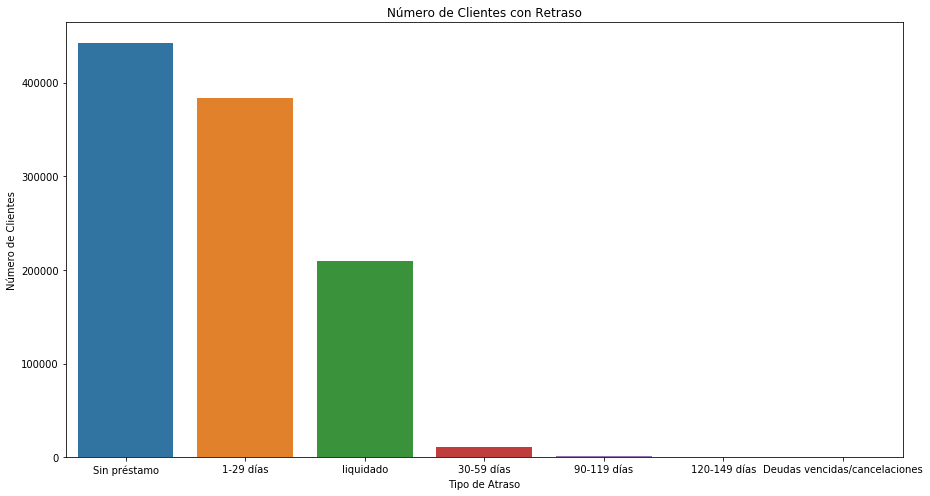

In [64]:
def label_retrasos(code):
    if code == "0":
        return "1-29 días"
    elif code == "1":
        return "30-59 días"
    elif code == "2":
        return "90-119 días"
    elif code == "3":
        return "90-119 días"
    elif code == "4":
        return "120-149 días"
    elif code == "5":
        return "Deudas vencidas/cancelaciones"
    elif code == "X":
        return "Sin préstamo"
    else:
        return "liquidado"
plt.figure(figsize = (15,8))
status_types = credit_record["STATUS"].value_counts()
quants = list(status_types)
uniques = credit_record["STATUS"].unique()

graph_df = pd.DataFrame({"tipo_credito": uniques, "num_usuarios":quants})

graph_df["tipo_credito"] = graph_df["tipo_credito"].apply(label_retrasos)
graph_df
num_clientes = sns.barplot(x = graph_df["tipo_credito"], y = graph_df["num_usuarios"])
num_clientes.set(xlabel='Tipo de Atraso', ylabel='Número de Clientes', title = "Número de Clientes con Retraso")
num_clientes.figure.savefig('número_clientes_retraso.png')


### Investigar el promedio de dias retrasados por cliente en el perido total

In [65]:
# número de personas con más de 30 días de atraso al año
# Convertir las categorias al número mediano de cado grupo
# dedidí convertir con el valor más grande del rango para minimizar el riesgo para el banco
def convert_to_dias(status):
    if status == "X":
        return 0 # no tener saldo es muy parecido a no tener atraso
    elif status == "0":
        return 29
    elif status == "1":
        return 59
    elif status == "2":
        return 89
    elif status == "3":
        return 119
    elif status == "4":
        return 149
    elif status == "5": # realmente corresponde a cancelaciones deudas vencidas o atrasos por más de 150 días. 
        #Decimos 200 días porque son clientes de alto riesgo
        200
    else:
        return 0 #clientes liquidos
credit_record["new_STATUS"] = credit_record["STATUS"].apply(convert_to_dias)
credit_record_cp = credit_record.copy()
credit_record_cp.set_index("ID").groupby("ID")["new_STATUS"].sum()

ID
5001711     87.0
5001712    290.0
5001713      0.0
5001714      0.0
5001715      0.0
           ...  
5150482    348.0
5150483      0.0
5150484    348.0
5150485     58.0
5150487      0.0
Name: new_STATUS, Length: 45985, dtype: float64

## KPIS

### Totaleros y Revolventes

### Terminos Claves
Cuando hablamos de tarjetas de crédito hay dos terminos importantes que describen como la gente maneja sus pagos: **totaleros** y **revolventes**. Totaleros son las personas que siempre liquida en la fecha de pago o antes. Para los bancos, los totaleros son los clientes de menor riesgo porque siempre pagan en tiempo. Los revolventes son aquellos clientes que tienden a no pagar el total de su deuda antes de la fecha de pago. En otros terminos, ellos llevan un saldo de mes a mes. Eso implica que ellos tienen que pagar interes que recompensa al banco por su riesgo aumentado.

### KPI 1: Clientes que han tenido más que 30 días de atraso en un año son malos para el año en cuestion
Racionalidad: Treinta días es una cantidad de tiempo muy adecuado para evaluar si un cliente es bueno o malo por dos razones. Primero, clientes que generalmente liquidan sus cuentas podrían olvidar la fecha de pago unas veces. Eso no necesariamente quiere decir que son malos. Simplemente, podría decir que olvidaron la fecha de pago unas vezes. La otra razon es porque treinte días generalmente es la cantidad de tiempo de un periodo de pago. Si llega a ser más tiempo que un periodo de pago, empieza a indicar que el cliente es revolvente.

En Estados Unidos (el país donde generaron esos datos), no se reporta un atraso menor a treinta días. Eso quiere decir que un atraso de treinta días no tiene un impacto en el crédito. Eso también implica que los clientes con menos de treinta días de atraso probablemente no presentan un alto riesgo para el banco.

In [66]:
make_year = lambda mes: mes/-12 # función para cambiar el mes al porcentaje del año
late = lambda status: 1 if status >= 29.0  else 0
credit_record["year"] = credit_record["MONTHS_BALANCE"].apply(make_year)
credit_record["late"] = credit_record["new_STATUS"].apply(late)

In [67]:
def get_year(year_column):
    if year_column < 0.08333333333333333:
        return 0
    elif (0.08333333333333333 <= year_column <=1):
        return 1
    elif (1 <= year_column <2):
        return 2
    elif (2 <= year_column <=3):
        return 3
    elif (3 <= year_column <4):
        return 4
    else: 
        return 5
credit_record["year_int"] = credit_record['year'].apply(get_year)
grouped_credit = credit_record.groupby(["ID", "year_int"])["new_STATUS"].sum().reset_index()

### Personas con crédito malo

In [68]:
malos = grouped_credit[grouped_credit["new_STATUS"] > 30]
malos

,ID,year_int,new_STATUS
1,5001711,1,87.0
3,5001712,1,116.0
4,5001712,2,174.0
18,5001717,1,232.0
19,5001717,2,261.0
...,...,...,...
145833,5150480,4,116.0
145834,5150480,5,58.0
145841,5150482,2,203.0
145842,5150482,3,145.0


### Personas con crédito bueno

In [69]:
buenos = grouped_credit[grouped_credit["new_STATUS"] <= 30]
buenos

,ID,year_int,new_STATUS
0,5001711,0,0.0
2,5001712,0,0.0
5,5001713,0,0.0
6,5001713,1,0.0
7,5001713,2,0.0
...,...,...,...
145849,5150485,1,29.0
145850,5150487,0,0.0
145851,5150487,1,0.0
145852,5150487,2,0.0


### % y número de clientes buenos y malos

In [70]:
print(f"% de creditos buenos {len(buenos)/(len(buenos) + len(malos)) * 100}")
print(f"% de creditos malos {len(malos)/(len(buenos) + len(malos))* 100}")
print(f"# de creditos malos {len(malos)} por año")
print(f"# de creditos buenos {len(buenos)} por año")

% de creditos buenos 59.78924129609061
% de creditos malos 40.21075870390939
# de creditos malos 58649 por año
# de creditos buenos 87205 por año


### Veamos el credito por año

In [71]:
def get_credit(data, year_int):
    bad_credit =  data[(data["year_int"] == year_int) & (data["new_STATUS"] > 30)]
    good_credit = data[(data["year_int"] == year_int) & (data["new_STATUS"] <= 30)]
    return bad_credit, good_credit


percentages = {}
for year in range(0,6):
    good, bad = get_credit(grouped_credit, year)
    per_good = len(good)/(len(good) + len(bad))
    percentages[year] = per_good

In [72]:
percentages_df = pd.DataFrame({"Año": list(percentages.keys()), "Crédito Bueno %": list(percentages.values())})

In [73]:
percentages_df

,Año,Crédito Bueno %
0,0,0.010013
1,1,0.458377
2,2,0.480999
3,3,0.566562
4,4,0.631669
5,5,0.691706


In [74]:
percentages_df["Crédito Bueno %"] = percentages_df["Crédito Bueno %"] * 100

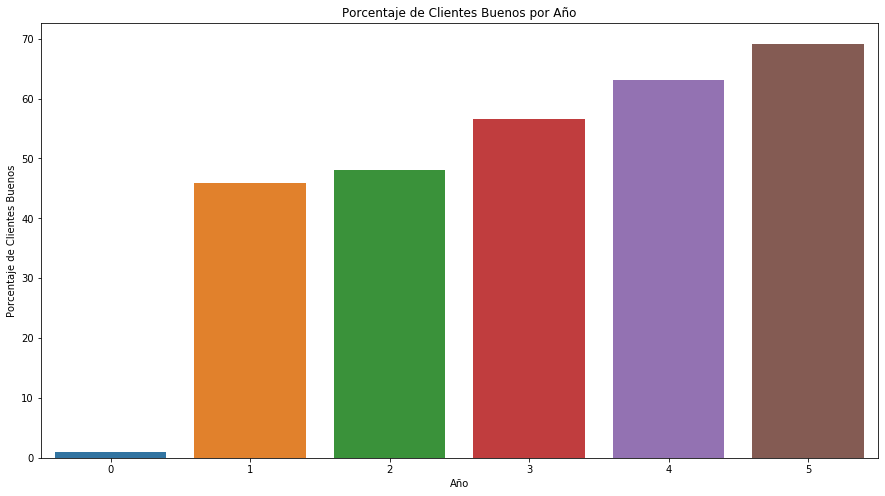

In [75]:
plt.figure(figsize = (15,8))
per_clientes = sns.barplot(x = percentages_df["Año"], y = percentages_df["Crédito Bueno %"])
per_clientes.set(xlabel='Año', ylabel='Porcentaje de Clientes Buenos', title = "Porcentaje de Clientes Buenos por Año")
per_clientes.figure.savefig('buenos_por_anho.png')




## KPI 2: Periodo de Tiempo de uso de la tarjeta

Puede tomar mucho tiempo en desarrollar una historia de crédito. Con más tiempo, es más facil determinar quienes son buenos clientes y quienes no. En este caso, un año de tiempo es un periodo muy adecuado porque durante un año se podrían ver la caracteristicas de un usuario con estacionalidad. Por ejemplo, se sabría si alguien gasta más de lo que puede pagar en las fiestas de diciembre, e incurre en días de atraso. Además, en el grafico en la parte final del KPI 1, se puede ver que el porcentaje de clientes buenos incrementa mucho con el tiempo. 

In [76]:
#poner un booleano para los clientes que han tenido más que un año como clientes
credit_record["mas_un_year"] = np.where(credit_record["MONTHS_BALANCE"]<=-12, 1, 0)
cliente_years = credit_record.groupby("ID")["mas_un_year"].sum().reset_index()
largo_tiempo = cliente_years[cliente_years["mas_un_year"] > 0]
recientes = cliente_years[cliente_years["mas_un_year"] == 0]
largo_tiempo.head()

,ID,mas_un_year
1,5001712,7
2,5001713,10
3,5001714,3
4,5001715,48
5,5001717,10


In [77]:
credit_record['new_STATUS'].value_counts()

0.0      651261
29.0     383120
59.0      11090
89.0        868
119.0       320
149.0       223
Name: new_STATUS, dtype: int64

In [78]:
recientes.head()

,ID,mas_un_year
0,5001711,0
11,5001725,0
13,5001728,0
14,5001729,0
16,5001731,0


In [79]:
print(f"Clientes que tienen más que un año de historia {len(largo_tiempo)}")
print(f"Clientes que tienen menos que un año de historia {len(recientes)}")
print(f"Porcentaje de clientes que tienen más que un año de historia \
{len(largo_tiempo)/(len(recientes)+len(largo_tiempo)) * 100}%")

Clientes que tienen más que un año de historia 35145
Clientes que tienen menos que un año de historia 10840
Porcentaje de clientes que tienen más que un año de historia 76.42709579210613%


El resultado dice que la gran mayoría de los clientes tienen más que un año usando la tarjeta de crédito. Además, los clientes que tienen más tiempo usando la tarjeta de crédito tienden a ser totaleros.

## KPI 3 y KPI por Mes: Promedio Movil por Cliente

Sería muy útil ver la trayectoría de días de atraso en promedio por mes por cliente. Eso nos daría idea de si un cliente estuviese mejorando o empeorarando. Un indicador muy útil será ver si el promedio movil está mejorando o empeorando con el tiempo. Decidí usar un periodo de 6 meses porque incluye suficientes clientes y sería suficiente tiempo para ver las tendencias de atrasos de los clientes. 

In [80]:
# Poner el dataset en orden por ID y por el mes
credit_record_ = credit_record.sort_values(['ID'], ascending=False)

In [81]:
# Tomar el promedio movil
credit_record_['moving'] = credit_record_.groupby('ID')['new_STATUS'].transform(lambda x: x.rolling(6, 1).mean())

#### Podemos decir que un cliente es malo si tienen un promedio movil mayor que 29

In [82]:
malos = credit_record_[credit_record_['moving'] >29]
buenos = credit_record_[credit_record_['moving'] <=29]
buenos[['ID', 'MONTHS_BALANCE', 'new_STATUS', 'moving']].head()

,ID,MONTHS_BALANCE,new_STATUS,moving
1048574,5150487,-29,0.0,0.0
1048559,5150487,-14,0.0,0.0
1048545,5150487,0,0.0,0.0
1048546,5150487,-1,0.0,0.0
1048547,5150487,-2,0.0,0.0


In [83]:
malos[['ID', 'MONTHS_BALANCE', 'new_STATUS', 'moving']].head()

,ID,MONTHS_BALANCE,new_STATUS,moving
1048243,5150464,-11,59.0,59.000000
1048232,5150464,0,0.0,29.500000
1048244,5150464,-12,59.0,29.500000
1048246,5150464,-14,29.0,34.333333
1048247,5150464,-15,29.0,39.166667


In [84]:
print("Número de clientes buenos",len(buenos))
print("Número de clientes malos",len(malos))
print("Porcentaje de clientes buenos",len(buenos)/(len(buenos)+len(malos)) * 100, '%')

Número de clientes buenos 1015451
Número de clientes malos 32309
Porcentaje de clientes buenos 96.91637397877376 %


## KPI Extra: Clientes que están mejorando

Se podría decir que un cliente está mejorando si su atraso del mes actual es menor que el promedio móvil.

In [85]:
# Indica los clientes que tienen el promedio movil más grande que el atraso del mes
credit_record_['mejorando'] = np.where(credit_record_['new_STATUS'] < credit_record_['moving'], 1, 0) 

In [86]:
mejorando = credit_record_[credit_record_['mejorando'] == 1]
no_mej = credit_record_[credit_record_['mejorando'] == 0]
mejorando.head()

,ID,MONTHS_BALANCE,STATUS,new_STATUS,year,late,year_int,mas_un_year,moving,mejorando
1048530,5150484,0,C,0.0,-0.000000,0,0,0,19.333333,1
1048495,5150482,-12,C,0.0,1.000000,0,1,1,9.666667,1
1048496,5150482,-13,C,0.0,1.083333,0,2,1,7.250000,1
1048498,5150482,-15,C,0.0,1.250000,0,2,1,5.800000,1
1048499,5150482,-16,C,0.0,1.333333,0,2,1,4.833333,1


In [87]:
print("Número de clientes que están mejorando",len(mejorando))
print("Número de clientes que no están mejorando",len(no_mej))
print("Porcentaje de clientes mejorando",len(mejorando)/len(credit_record_) * 100, '%')

Número de clientes que están mejorando 161701
Número de clientes que no están mejorando 886874
Porcentaje de clientes mejorando 15.421023770355005 %


### Resumen de Totaleros y Revolventes

In [88]:
# Cuantos totaleros hay: Digamos que un totalero siempre paga en tiempo
credit_record_group = credit_record_.groupby("ID")['new_STATUS'].sum().reset_index()
print("Num. de totaleros", len(credit_record_group[credit_record_group["new_STATUS"]==0]))
print("Num. de revolventes", len(credit_record_group[credit_record_group["new_STATUS"]>29]))

Num. de totaleros 5954
Num. de revolventes 37411


### Análisis de vintage

In [89]:
#Análisis por cosechas

grouped = credit_record.groupby('ID')

pivot_tb = credit_record.pivot(index = 'ID', columns = 'MONTHS_BALANCE', values = 'STATUS')
pivot_tb['open_month'] = grouped['MONTHS_BALANCE'].min() # smallest value of MONTHS_BALANCE, is the month when loan was granted
pivot_tb['end_month'] = grouped['MONTHS_BALANCE'].max() # biggest value of MONTHS_BALANCE, might be observe over or canceling account
pivot_tb['ID'] = pivot_tb.index
pivot_tb = pivot_tb[['ID', 'open_month', 'end_month']]
pivot_tb['window'] = pivot_tb['end_month'] - pivot_tb['open_month'] # calculate observe window
pivot_tb.reset_index(drop = True, inplace = True)
credit = pd.merge(credit_record, pivot_tb, on = 'ID', how = 'left') # join calculated information
credit0 = credit.copy()
credit = credit[credit['window'] > 20] # delete users whose observe window is less than 20
credit['status2'] = np.where((credit['STATUS'] == '2') | (credit['STATUS'] == '3' )| (credit['STATUS'] == '4' )| (credit['STATUS'] == '5'), 1, 0) # analyze > 60 days past due 
credit['status2'] = credit['status2'].astype(np.int8) # 1: overdue 0: not
credit['month_on_book'] = credit['MONTHS_BALANCE'] - credit['open_month'] # calculate month on book: how many months after opening account
credit.sort_values(by = ['ID','month_on_book'], inplace = True)

##### denominator
denominator = pivot_tb.groupby(['open_month']).agg({'ID': ['count']}) # count how many users in every month the account was opened
denominator.reset_index(inplace = True)
denominator.columns = ['open_month','sta_sum']

##### vintage table
vintage = credit.groupby(['open_month','month_on_book']).agg({'ID': ['count']}) 
vintage.reset_index(inplace = True)
vintage.columns = ['open_month','month_on_book','sta_sum'] 
vintage['due_count'] = np.nan
vintage = vintage[['open_month','month_on_book','due_count']] 
vintage = pd.merge(vintage, denominator, on = ['open_month'], how = 'left')
vintage

,open_month,month_on_book,due_count,sta_sum
0,-60,0,NaN,415
1,-60,1,NaN,415
2,-60,2,NaN,415
3,-60,3,NaN,415
4,-60,4,NaN,415
...,...,...,...,...
1655,-21,17,NaN,858
1656,-21,18,NaN,858
1657,-21,19,NaN,858
1658,-21,20,NaN,858


In [90]:
for j in range(-60,1): # outer loop: month in which account was opened
    ls = []
    for i in range(0,61): # inner loop time after the credit card was granted
        due = list(credit[(credit['status2'] == 1) & (credit['month_on_book'] == i) & (credit['open_month'] == j)]['ID']) # get ID which satisfy the condition
        ls.extend(due) # As time goes, add bad customers
        vintage.loc[(vintage['month_on_book'] == i) & (vintage['open_month'] == j), 'due_count'] = len(set(ls)) # calculate non-duplicate ID numbers using set()
        
vintage['sta_rate']  = vintage['due_count'] / vintage['sta_sum'] # calculate cumulative % of bad customers
vintage  

,open_month,month_on_book,due_count,sta_sum,sta_rate
0,-60,0,0.0,415,0.000000
1,-60,1,0.0,415,0.000000
2,-60,2,0.0,415,0.000000
3,-60,3,0.0,415,0.000000
4,-60,4,0.0,415,0.000000
...,...,...,...,...,...
1655,-21,17,15.0,858,0.017483
1656,-21,18,15.0,858,0.017483
1657,-21,19,15.0,858,0.017483
1658,-21,20,15.0,858,0.017483


In [91]:
### Vintage wide table
vintage_wide = vintage.pivot(index = 'open_month',
                             columns = 'month_on_book',
                             values = 'sta_rate')
vintage_wide

month_on_book,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
open_month,,,,,,,,,,,,,,,,,,,,,
-60,0.00000,0.000000,0.000000,0.000000,0.000000,0.002410,0.002410,0.007229,0.007229,0.009639,...,0.028916,0.028916,0.028916,0.028916,0.028916,0.028916,0.028916,0.031325,0.031325,0.031325
-59,0.00000,0.000000,0.000000,0.004926,0.004926,0.004926,0.007389,0.007389,0.007389,0.012315,...,0.029557,0.029557,0.029557,0.032020,0.032020,0.032020,0.032020,0.032020,0.032020,NaN
-58,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004545,0.006818,0.006818,...,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,NaN,NaN
-57,0.00000,0.000000,0.000000,0.000000,0.002500,0.002500,0.002500,0.007500,0.007500,0.007500,...,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,NaN,NaN,NaN
-56,0.00000,0.000000,0.004255,0.004255,0.008511,0.010638,0.010638,0.017021,0.017021,0.021277,...,0.036170,0.036170,0.036170,0.036170,0.038298,0.038298,NaN,NaN,NaN,NaN
-55,0.00000,0.000000,0.002058,0.006173,0.012346,0.016461,0.022634,0.022634,0.022634,0.024691,...,0.045267,0.045267,0.045267,0.045267,0.045267,NaN,NaN,NaN,NaN,NaN
-54,0.00000,0.000000,0.000000,0.002137,0.004274,0.004274,0.006410,0.012821,0.012821,0.017094,...,0.032051,0.032051,0.032051,0.032051,NaN,NaN,NaN,NaN,NaN,NaN
-53,0.00000,0.002028,0.002028,0.002028,0.004057,0.004057,0.008114,0.010142,0.010142,0.012170,...,0.028398,0.028398,0.028398,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-52,0.00000,0.000000,0.007233,0.009042,0.009042,0.009042,0.012658,0.012658,0.014467,0.016275,...,0.023508,0.023508,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


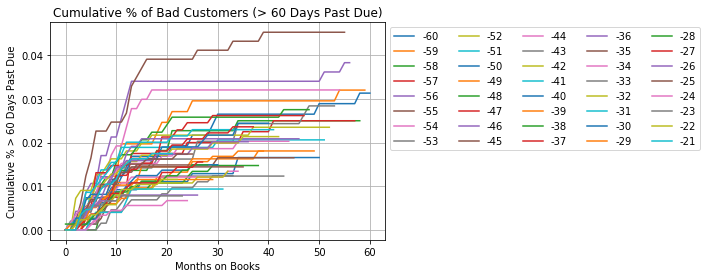

In [122]:
# plot vintage line chart
plt.rcParams['figure.facecolor'] = 'white'
vintage0 = vintage_wide.replace(0,np.nan)
lst = [i for i in range(0,61)]
vintage_wide[lst].T.plot(legend = True, grid = True, title = 'Cumulative % of Bad Customers (> 60 Days Past Due)')
plt.legend(ncol=5, bbox_to_anchor=(1, .5, 0.5, 0.5))
#plt.axvline(30)
#plt.axvline(25)
#plt.axvline(20)
plt.xlabel('Months on Books')
plt.ylabel('Cumulative % > 60 Days Past Due')
plt.show()

## Caracteristicas de los Clientes buenos y malos

In [123]:
#Creating columns for age and years of employment
app_record['AGE'] = -app_record.DAYS_BIRTH // 365
app_record['WORKING_YEARS'] = -app_record.DAYS_EMPLOYED // 365
app_record.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE,WORKING_YEARS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,32,12
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,32,12
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,58,3
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,52,8
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,52,8


In [125]:
#month of account opening
first_month=pd.DataFrame(credit_record.groupby(["ID"])["MONTHS_BALANCE"].agg(min))
first_month=first_month.rename(columns={'MONTHS_BALANCE':'first_month'}) 
merged=pd.merge(app_record,first_month,how="left",on="ID") #merge to record data
merged.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE,WORKING_YEARS,first_month
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,NaN,2.0,32,12,-15.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,NaN,2.0,32,12,-14.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,-1134,1,0,0,0,Security staff,2.0,58,3,-29.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,-3051,1,0,1,1,Sales staff,1.0,52,8,-4.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,-3051,1,0,1,1,Sales staff,1.0,52,8,-26.0


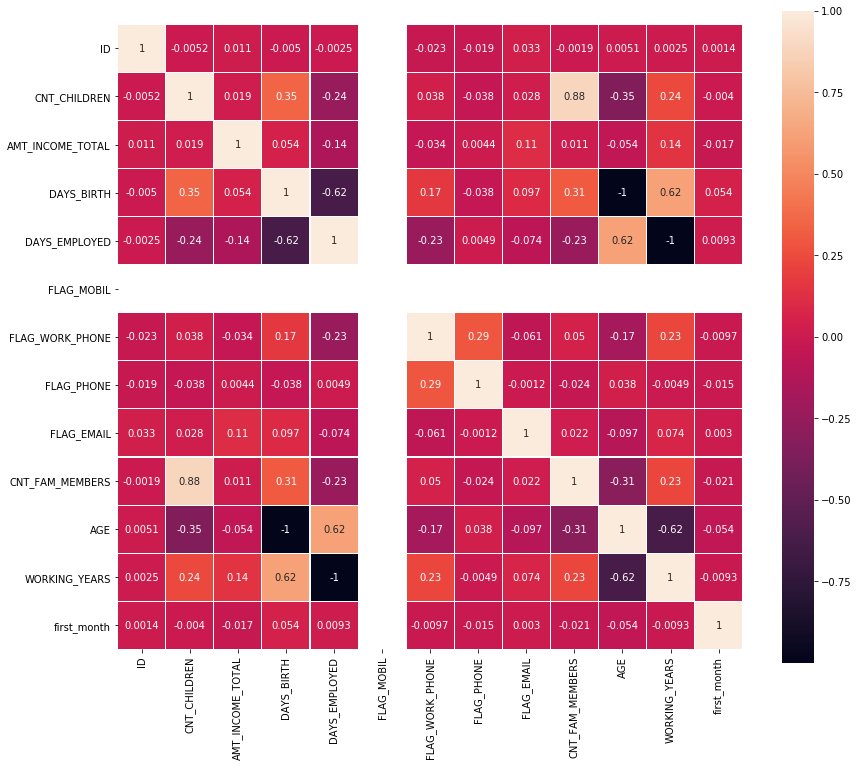

In [126]:


#Correlations
plt.figure(figsize=(14,12))
sns.heatmap(merged.corr(),linewidths=0.1,vmax=1.0, 
            square=True,  linecolor='white', annot=True)
plt.show()

Usando el primer KPI, vamos a investigar las caracteristicas de los clientes buenos y malos. Primero, vamos a asignar una variable dummy que dice si un cliente es bueno o malo. Usando eso, vamos a hacer un join con la tabla de "app record" para analizar las caracteristicas de los clientes buenos y malos

In [93]:
# Vamos a usar la tabla de grouped_credit, que tiene información de cada año por los clientes
credit_record.head()

,ID,MONTHS_BALANCE,STATUS,new_STATUS,year,late,year_int,mas_un_year
0,5001711,0,X,0.0,-0.000000,0,0,0
1,5001711,-1,0,29.0,0.083333,1,1,0
2,5001711,-2,0,29.0,0.166667,1,1,0
3,5001711,-3,0,29.0,0.250000,1,1,0
4,5001712,0,C,0.0,-0.000000,0,0,0


In [94]:
# le agregamos una variable dummy que dice si son clientes buenos o malos
def add_dummy(status):
    "Agrega una variable dummy. Devuelve 0 si es un cliente bueno y 1 si es un cliente malo."
    if status > 30:
        return 1
    else:
        return 0
credit_record["credit_cal"] = credit_record['new_STATUS'].apply(add_dummy)
credit_record.head()

,ID,MONTHS_BALANCE,STATUS,new_STATUS,year,late,year_int,mas_un_year,credit_cal
0,5001711,0,X,0.0,-0.000000,0,0,0,0
1,5001711,-1,0,29.0,0.083333,1,1,0,0
2,5001711,-2,0,29.0,0.166667,1,1,0,0
3,5001711,-3,0,29.0,0.250000,1,1,0,0
4,5001712,0,C,0.0,-0.000000,0,0,0,0


In [95]:
# Vamos a hacer el merge con la tabla de app_record
# hay que usar un left merge para quedar con todos los datos de grouped_cred
credit_app = credit_record.merge(app_record, how = "left", on = "ID")
credit_app.tail()

,ID,MONTHS_BALANCE,STATUS,new_STATUS,year,late,year_int,mas_un_year,credit_cal,CODE_GENDER,...,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
1048570,5150487,-25,C,0.0,2.083333,0,3,1,0,M,...,Married,House / apartment,-19398.0,-2166.0,1.0,0.0,0.0,0.0,Drivers,2.0
1048571,5150487,-26,C,0.0,2.166667,0,3,1,0,M,...,Married,House / apartment,-19398.0,-2166.0,1.0,0.0,0.0,0.0,Drivers,2.0
1048572,5150487,-27,C,0.0,2.250000,0,3,1,0,M,...,Married,House / apartment,-19398.0,-2166.0,1.0,0.0,0.0,0.0,Drivers,2.0
1048573,5150487,-28,C,0.0,2.333333,0,3,1,0,M,...,Married,House / apartment,-19398.0,-2166.0,1.0,0.0,0.0,0.0,Drivers,2.0
1048574,5150487,-29,C,0.0,2.416667,0,3,1,0,M,...,Married,House / apartment,-19398.0,-2166.0,1.0,0.0,0.0,0.0,Drivers,2.0


In [96]:
# Hay que investigar los valores NaN
credit_app.isna().sum()/len(credit_app)

ID                     0.000000
MONTHS_BALANCE         0.000000
STATUS                 0.000000
new_STATUS             0.001615
year                   0.000000
late                   0.000000
year_int               0.000000
mas_un_year            0.000000
credit_cal             0.000000
CODE_GENDER            0.258312
FLAG_OWN_CAR           0.258312
FLAG_OWN_REALTY        0.258312
CNT_CHILDREN           0.258312
AMT_INCOME_TOTAL       0.258312
NAME_INCOME_TYPE       0.258312
NAME_EDUCATION_TYPE    0.258312
NAME_FAMILY_STATUS     0.258312
NAME_HOUSING_TYPE      0.258312
DAYS_BIRTH             0.258312
DAYS_EMPLOYED          0.258312
FLAG_MOBIL             0.258312
FLAG_WORK_PHONE        0.258312
FLAG_PHONE             0.258312
FLAG_EMAIL             0.258312
OCCUPATION_TYPE        0.487240
CNT_FAM_MEMBERS        0.258312
dtype: float64

In [97]:
# Debido a la cantidad de valores NaN, va a ser necesario quitar los NaN
# Por la cantidad de NaN en la variable OCCUPATION_TYPE, le quitamos ese variable
# Si tuvieramos más tiempo, valdría la pena hacer un analisis con esa variable y sin esa variable
credit_app_clean = credit_app.copy()
credit_app_clean = credit_app_clean.drop("OCCUPATION_TYPE", axis = 1)
credit_app_clean = credit_app_clean.dropna()

In [98]:
credit_app_clean.head()

,ID,MONTHS_BALANCE,STATUS,new_STATUS,year,late,year_int,mas_un_year,credit_cal,CODE_GENDER,...,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
92938,5008804,0,C,0.0,-0.000000,0,0,0,0,M,...,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,2.0
92939,5008804,-1,C,0.0,0.083333,0,1,0,0,M,...,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,2.0
92940,5008804,-2,C,0.0,0.166667,0,1,0,0,M,...,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,2.0
92941,5008804,-3,C,0.0,0.250000,0,1,0,0,M,...,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,2.0
92942,5008804,-4,C,0.0,0.333333,0,1,0,0,M,...,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,2.0


#### Hay que sacar variables dummy para las variables que no son númericas

In [99]:
credit_app_dummy = pd.get_dummies(credit_app_clean)

In [100]:
credit_app_dummy.head()

,ID,MONTHS_BALANCE,new_STATUS,year,late,year_int,mas_un_year,credit_cal,CNT_CHILDREN,AMT_INCOME_TOTAL,...,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents
92938,5008804,0,0.0,-0.000000,0,0,0,0,0.0,427500.0,...,0,0,0,0,0,0,0,0,1,0
92939,5008804,-1,0.0,0.083333,0,1,0,0,0.0,427500.0,...,0,0,0,0,0,0,0,0,1,0
92940,5008804,-2,0.0,0.166667,0,1,0,0,0.0,427500.0,...,0,0,0,0,0,0,0,0,1,0
92941,5008804,-3,0.0,0.250000,0,1,0,0,0.0,427500.0,...,0,0,0,0,0,0,0,0,1,0
92942,5008804,-4,0.0,0.333333,0,1,0,0,0.0,427500.0,...,0,0,0,0,0,0,0,0,1,0


#### Hacer un T-Test para ver la caracteristicas de los clientes buenos y malos: Solamente para las variable continuas
Se puede usar un T-test porque vamos a comparar solamente dos grupos: los clientes buenos y malos. En este caso, vamos a comporar los promedios de las caracteristicas de los clientes. Un ejemplo podría ser 'CNT_CHILDREN' o la cantidad de hijos.

$h_0$ : El promedio de las caracteristicas es igual para los dos grupos

$h_a$: El promedio de las caracteristicas no es igual para los dos grupos

In [101]:
# Confirmar que los variables son continuous
credit_app_dummy[['CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED']]

,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED
92938,0.0,427500.0,-12005.0,-4542.0
92939,0.0,427500.0,-12005.0,-4542.0
92940,0.0,427500.0,-12005.0,-4542.0
92941,0.0,427500.0,-12005.0,-4542.0
92942,0.0,427500.0,-12005.0,-4542.0
...,...,...,...,...
1048570,0.0,202500.0,-19398.0,-2166.0
1048571,0.0,202500.0,-19398.0,-2166.0
1048572,0.0,202500.0,-19398.0,-2166.0
1048573,0.0,202500.0,-19398.0,-2166.0


In [102]:
cols = ['CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'CNT_FAM_MEMBERS'] # son la variables continuas
def get_t_stats(data = credit_app_dummy, cols = cols):
    data_buenos = data.loc[data['credit_cal'] == 0]
    data_malos = data.loc[data['credit_cal'] == 1]
    p_values = []
    t_stats = []
    mean_buenos = []
    mean_malos = []
    for col in cols:
        data_buenos_col = data_buenos[col].to_numpy()
        data_malos_col = data_malos[col].to_numpy()
        mean_bueno = data_buenos[col].mean()
        mean_malo = data_malos[col].mean()
        mean_buenos.append(mean_bueno)
        mean_malos.append(mean_malo)
        t_test = stats.ttest_ind(a = data_buenos_col, b = data_malos_col)
        p_values.append(t_test[1])
        t_stats.append(t_test[0])
    t_results = pd.DataFrame()
    t_results['Variable'] = cols
    t_results["T_stat"] = t_stats
    t_results["Valor P"] = p_values
    t_results["Promedio_bueno"] = mean_buenos
    t_results["Promedio_malo"] = mean_malos
    return t_results
        
t_results = get_t_stats()
        

In [103]:
t_results.iloc[2, 3] = t_results.iloc[2, 3] * -1 # hay que quitar el negativo de los días empleado
t_results.iloc[2, 4] = t_results.iloc[2, 4] * -1
t_results['higher_malo'] = np.where(t_results['Promedio_bueno'] >= t_results['Promedio_malo'], 0, 1)


#### Las variables que cuando tienen un promedio más alto indican un mejor cliente

In [104]:
t_results[t_results['higher_malo']== 0][['Variable', 'Valor P']]

,Variable,Valor P
2,DAYS_BIRTH,1.681641e-62
3,DAYS_EMPLOYED,1.765835e-12


Eso indica que personas que son mayores y que han tenido más tiempo en un empleo son mejores. Eso tiene mucho sentido porque con más tiempo, alguien tendría más experencia en paga las tarjetas de crédito. Similarmente, con un empleo seguro, es más probable que tienen una fuente de ingresos constante.

In [105]:
t_results[t_results['higher_malo']== 1][['Variable', 'Valor P']]

,Variable,Valor P
0,CNT_CHILDREN,2.823081e-07
1,AMT_INCOME_TOTAL,8.341748e-05
4,CNT_FAM_MEMBERS,4.643626e-02


En resumen, deberíamos  buscar clientes que tienen un empleo estable y que son mayores. Sin embargo, yo recomiendo que busquemos clientes jovenes también porque tienen la habilidad de ser clientes por muchos años. Para clientes que tienden a ser malos, asombrosamente tienen a tener ingresos más altos. También tienen más hijos y más personas en la familia. Eso podría ser porque personas con más diner tienen menos preocupación de pagar una tarifa por atraso.

#### Para comparar las variables catégoricos es necesario usar una prueba $X^2$

$h_0$ : No existe una relación entre los dos grupos. Clientes malos tienen la misma distribución que los clientes buenos.

$h_a$: Existe una relación entre los dos grupos. Clientes malos tienen una distribución distinta que los clientes buenos.

In [106]:
credit_app_dummy.columns

Index(['ID', 'MONTHS_BALANCE', 'new_STATUS', 'year', 'late', 'year_int',
       'mas_un_year', 'credit_cal', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'STATUS_0', 'STATUS_1',
       'STATUS_2', 'STATUS_3', 'STATUS_4', 'STATUS_C', 'STATUS_X',
       'CODE_GENDER_F', 'CODE_GENDER_M', 'FLAG_OWN_CAR_N', 'FLAG_OWN_CAR_Y',
       'FLAG_OWN_REALTY_N', 'FLAG_OWN_REALTY_Y',
       'NAME_INCOME_TYPE_Commercial associate', 'NAME_INCOME_TYPE_Pensioner',
       'NAME_INCOME_TYPE_State servant', 'NAME_INCOME_TYPE_Student',
       'NAME_INCOME_TYPE_Working', 'NAME_EDUCATION_TYPE_Academic degree',
       'NAME_EDUCATION_TYPE_Higher education',
       'NAME_EDUCATION_TYPE_Incomplete higher',
       'NAME_EDUCATION_TYPE_Lower secondary',
       'NAME_EDUCATION_TYPE_Secondary / secondary special',
       'NAME_FAMILY_STATUS_Civil marriage', 'NAME_FAMILY_STATUS_Married',
       'NAME_FAMI

In [107]:
#Las columnas categoricas
columns = ['FLAG_MOBIL',
       'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 
       'CODE_GENDER_F', 'CODE_GENDER_M', 'FLAG_OWN_CAR_N', 'FLAG_OWN_CAR_Y',
       'FLAG_OWN_REALTY_N', 'FLAG_OWN_REALTY_Y',
       'NAME_INCOME_TYPE_Commercial associate', 'NAME_INCOME_TYPE_Pensioner',
       'NAME_INCOME_TYPE_State servant', 'NAME_INCOME_TYPE_Student',
       'NAME_INCOME_TYPE_Working', 'NAME_EDUCATION_TYPE_Academic degree',
       'NAME_EDUCATION_TYPE_Higher education',
       'NAME_EDUCATION_TYPE_Incomplete higher',
       'NAME_EDUCATION_TYPE_Lower secondary',
       'NAME_EDUCATION_TYPE_Secondary / secondary special',
       'NAME_FAMILY_STATUS_Civil marriage', 'NAME_FAMILY_STATUS_Married',
       'NAME_FAMILY_STATUS_Separated',
       'NAME_FAMILY_STATUS_Single / not married', 'NAME_FAMILY_STATUS_Widow',
       'NAME_HOUSING_TYPE_Co-op apartment',
       'NAME_HOUSING_TYPE_House / apartment',
       'NAME_HOUSING_TYPE_Municipal apartment',
       'NAME_HOUSING_TYPE_Office apartment',
       'NAME_HOUSING_TYPE_Rented apartment', 'NAME_HOUSING_TYPE_With parents']
# función para calcular el X^2
def get_chi(col, data = credit_app_dummy):
    "No da el estadistico de X^2 y su valor P"
    data_crosstab = pd.crosstab(credit_app_dummy['credit_cal'],
                                credit_app_dummy[col],
                               margins=False)#, margins_name="Total")
    chi2 = chi2_contingency(data_crosstab)
    x_2 = chi2[0]
    p_val = chi2[1]
    deg_freedom = chi2[2]
    return x_2, p_val, deg_freedom
# Aplicar para todas las variables categoricas
p_values = []
chi_squares = []
deg_freedoms = []
freq_goods = []
freq_bads = []
for col in columns:
    chi_square, p_value, deg_freedom = get_chi(col = col)
    good_clients = credit_app_dummy[(credit_app_dummy['credit_cal'] == 0)]
    bad_clients = credit_app_dummy[(credit_app_dummy['credit_cal'] == 1)]
    freq_gd = len(good_clients[(good_clients[col] == 1)])/len(good_clients)
    freq_bd = len(bad_clients[(bad_clients[col] == 1)])/len(bad_clients)
    freq_goods.append(freq_gd)
    freq_bads.append(freq_bd)
    #print(p_value)
    p_values.append(p_value)
    chi_squares.append(chi_square)
    deg_freedoms.append(deg_freedom)
# Hacer el dataframe
chi_df = pd.DataFrame()
chi_df["Variable"] = columns
chi_df['X_2'] = chi_squares
chi_df['valor_p'] = p_values
chi_df['deg_freedom'] = deg_freedoms
chi_df['frecuencia_buenos'] = freq_goods
chi_df['frecuencia_malos'] = freq_bads

In [108]:
chi_df

,Variable,X_2,valor_p,deg_freedom,frecuencia_buenos,frecuencia_malos
0,FLAG_MOBIL,0.000000,1.000000e+00,0,1.000000,1.000000
1,FLAG_WORK_PHONE,13.815086,2.017101e-04,1,0.231515,0.247313
2,FLAG_PHONE,1.710969,1.908598e-01,1,0.300859,0.294785
3,FLAG_EMAIL,5.444545,1.962952e-02,1,0.091615,0.098428
4,CODE_GENDER_F,58.776974,1.765959e-14,1,0.667888,0.631568
5,CODE_GENDER_M,58.776974,1.765959e-14,1,0.332112,0.368432
6,FLAG_OWN_CAR_N,14.249429,1.601093e-04,1,0.608441,0.626990
7,FLAG_OWN_CAR_Y,14.249429,1.601093e-04,1,0.391559,0.373010
8,FLAG_OWN_REALTY_N,107.269492,3.885701e-25,1,0.339897,0.389232
9,FLAG_OWN_REALTY_Y,107.269492,3.885701e-25,1,0.660103,0.610768


### Usando un valor crítico de $\alpha$ = 0.05, las variables significativas son:

In [109]:
# divide into variables that indicate better clients and worse
# encontrar variables importantes en la dirección positiva y negativa
chi_df['higher_good'] = np.where(chi_df['frecuencia_buenos'] >= chi_df['frecuencia_malos'], 0, 1)

In [110]:
significants = chi_df[chi_df['valor_p'] <= 0.05]
significants_positivos = significants[significants['higher_good'] == 0]
significants_negativos = significants[significants['higher_good'] == 1]

#### Las variables significativas que los clientes buenos tienden a tener con mayor frecuencia
Caracteristicas que deberíamos buscar

In [111]:
significants_positivos[['Variable', 'valor_p']]

,Variable,valor_p
4,CODE_GENDER_F,1.765959e-14
7,FLAG_OWN_CAR_Y,1.601093e-04
9,FLAG_OWN_REALTY_Y,3.885701e-25
11,NAME_INCOME_TYPE_Pensioner,3.678336e-08
14,NAME_INCOME_TYPE_Working,2.189691e-02
16,NAME_EDUCATION_TYPE_Higher education,2.650166e-03
19,NAME_EDUCATION_TYPE_Secondary / secondary special,8.975421e-03
21,NAME_FAMILY_STATUS_Married,1.341003e-13
26,NAME_HOUSING_TYPE_House / apartment,1.146189e-06


#### Las variables significativas que los clientes malos tienden a tener con mayor frecuencia

In [112]:
significants_negativos[['Variable',  'valor_p']]

,Variable,valor_p
1,FLAG_WORK_PHONE,2.017101e-04
3,FLAG_EMAIL,1.962952e-02
5,CODE_GENDER_M,1.765959e-14
6,FLAG_OWN_CAR_N,1.601093e-04
8,FLAG_OWN_REALTY_N,3.885701e-25
10,NAME_INCOME_TYPE_Commercial associate,1.592856e-15
17,NAME_EDUCATION_TYPE_Incomplete higher,3.644721e-33
18,NAME_EDUCATION_TYPE_Lower secondary,9.723201e-03
20,NAME_FAMILY_STATUS_Civil marriage,8.858396e-03
23,NAME_FAMILY_STATUS_Single / not married,2.610332e-19


Muchas de las caracteristicas de los clientes buenos y malos tienen mucho sentido. Por ejemplo, en la categoría de clientes malos, hay una frequencia más alta de personas que no tienen una educación de universidad. También son más propensos a no tener su propia casa o coche. A diferencia de los clientes malos, los clientes buenos tienden a tener más educación y tener propiedades. Por eso, recomiendo buscar clientes que tienen las caracteristicas que indican que serán buenos clientes e intentar minimizar las caracteristicas que indican que serán malos. Por ejemplo, podríamos buscar clientes que cuentan con licenciatura porque es muy indicativo que serán buenos clientes.

### Veremos el porcentaje de variables significativas

In [113]:
print("% de variables significativa", len(significants)/(len(chi_df)))

% de variables significativa 0.7096774193548387


## Recommendaciones de Clientes

Basado en la investigación que de las variables importantes, tenemos información que nos permite escoger clientes que presentan menos riesgo y más probabilidad de ser rentables.

Algunas caracteristicas también son más accionables que otras. Empezando con las variables continuas, el ingreso probablmente es la variable más accionable porque facilmente podemos sacar esta información cuando clientes aplican para tarjetas de crédito. La otra variable continua que recomiendo sacar es la cantidad de tiempo que alguién ha sido empleado.

Para las variables categóricas, yo recomiendo sacar información sobre el nivel de educación porque eso es muy indicativo si alguien va a ser un cliente buen o malo. Las otras dos variables que recomiendo sacar son la variable si alguién tiene una casa y un coche.

En resumen, recomiendo que busquemos **clientes que tienen un nivel de educación mayor que la secundaría, que tienen casa o coche y que tienen un ingreso que es mayor que 
una desviación estándar del promedio**. También, es importante recordar que no deberíamos implementar desmasiadas filtros porque podríamos disminuir la cantidad de clientes posibles. Por eso, yo recomiendo que los clientes tengan por los menos dos de las caracteristicas mencionadas. Aunque, las otras variables son importantes, son menos accionables porque no podemos preguntar demasiadas cosas en la solicitud porque es probable que no la terminen. 